In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

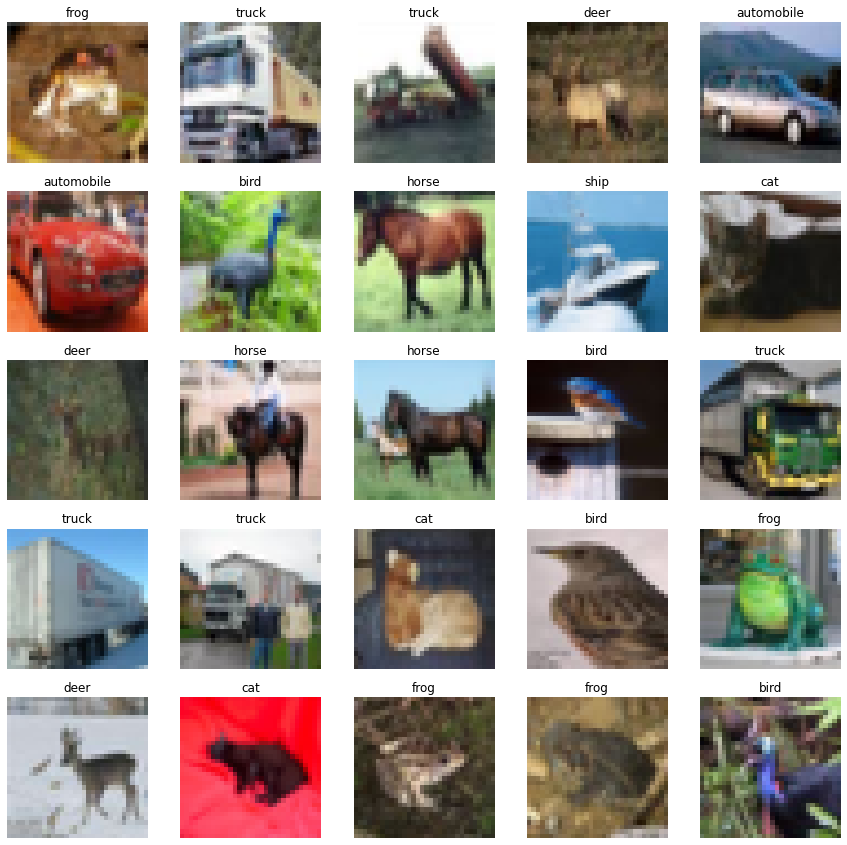

In [5]:
plt.figure(figsize = (15,15))
for i,img in enumerate(train_x[:25]) :
    ax = plt.subplot(5,5,i+1)
    ax.set_title(label[train_y[i][0]])
    plt.imshow(img, vmin=0, vmax=255)
    plt.axis('off')
plt.show()
    

In [8]:
IMG_SHAPE = (32,32,3)

vgg_pre = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                      include_top=False,
                                      weights='imagenet')   
output = vgg_pre.layers[-1].output
output = tf.keras.layers.Flatten()(output)
vgg1 = Model(vgg_pre.input, output)

In [9]:
vgg1.trainable = False
layers = [(layer, layer.name, layer.trainable) for layer in vgg1.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])   

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.In...,input_3,False
1,<tensorflow.python.keras.layers.convolutional....,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional....,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPoo...,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional....,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional....,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPoo...,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional....,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional....,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional....,block3_conv3,False


In [10]:
tf.random.set_seed(2021)
model1 = Sequential()
model1.add(vgg1)
model1.add(Dense(128, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10))   

In [11]:
model1.compile(optimizer = optimizers.Adam(learning_rate=0.001),
               loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics='accuracy')
history = model1.fit(train_x, train_y, batch_size=256, validation_split=0.2, epochs=5)

Epoch 1/5
157/157 [==============================] - 39s 44ms/step - loss: 5.6785 - accuracy: 0.3139 - val_loss: 1.6854 - val_accuracy: 0.4581
Epoch 2/5
157/157 [==============================] - 6s 36ms/step - loss: 1.4828 - accuracy: 0.5080 - val_loss: 1.4543 - val_accuracy: 0.5107
Epoch 3/5
157/157 [==============================] - 6s 36ms/step - loss: 1.2291 - accuracy: 0.5820 - val_loss: 1.3491 - val_accuracy: 0.5523
Epoch 4/5
157/157 [==============================] - 6s 36ms/step - loss: 1.1035 - accuracy: 0.6181 - val_loss: 1.3356 - val_accuracy: 0.5572
Epoch 5/5
157/157 [==============================] - 6s 36ms/step - loss: 1.0105 - accuracy: 0.6520 - val_loss: 1.3129 - val_accuracy: 0.5678


In [12]:
vgg_random = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                         include_top=False,
                                         weights=None)     # random하게 초기화된 값으로 로드합니다. 
output = vgg_random.layers[-1].output
output = tf.keras.layers.Flatten()(output)
vgg2 = Model(vgg_random.input, output)

In [13]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg2.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.In...,input_4,True
1,<tensorflow.python.keras.layers.convolutional....,block1_conv1,True
2,<tensorflow.python.keras.layers.convolutional....,block1_conv2,True
3,<tensorflow.python.keras.layers.pooling.MaxPoo...,block1_pool,True
4,<tensorflow.python.keras.layers.convolutional....,block2_conv1,True
5,<tensorflow.python.keras.layers.convolutional....,block2_conv2,True
6,<tensorflow.python.keras.layers.pooling.MaxPoo...,block2_pool,True
7,<tensorflow.python.keras.layers.convolutional....,block3_conv1,True
8,<tensorflow.python.keras.layers.convolutional....,block3_conv2,True
9,<tensorflow.python.keras.layers.convolutional....,block3_conv3,True


In [14]:
tf.random.set_seed(2021)
model2 = Sequential()
model2.add(vgg2)
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10))

model2.compile(optimizer = optimizers.Adam(learning_rate=0.001),
               loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics='accuracy')
history = model2.fit(train_x, train_y, batch_size=256, validation_split=0.2, epochs=5)

Epoch 1/5
157/157 [==============================] - 20s 116ms/step - loss: 2.3300 - accuracy: 0.1016 - val_loss: 2.3035 - val_accuracy: 0.0980
Epoch 2/5
157/157 [==============================] - 17s 111ms/step - loss: 2.3045 - accuracy: 0.1023 - val_loss: 2.3025 - val_accuracy: 0.0952
Epoch 3/5
157/157 [==============================] - 17s 111ms/step - loss: 2.3036 - accuracy: 0.1010 - val_loss: 2.3029 - val_accuracy: 0.0980
Epoch 4/5
157/157 [==============================] - 17s 111ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 5/5
157/157 [==============================] - 17s 111ms/step - loss: 2.3026 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.0952


### vgg3 정의
### trainable = True

In [16]:
##################
vgg_pre = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet')    
output = vgg_pre.layers[-1].output
output = tf.keras.layers.Flatten()(output)
vgg3 = Model(vgg_pre.input, output)
vgg3.trainable = True
##################
tf.random.set_seed(2021)
model3 = Sequential()
model3.add(vgg3)
model3.add(Dense(128, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10))

model3.compile(optimizer = optimizers.Adam(learning_rate=0.001),
               loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics='accuracy')
history = model3.fit(train_x, train_y, batch_size=256, validation_split=0.2, epochs=5)

Epoch 1/5
157/157 [==============================] - 18s 113ms/step - loss: 7.4782 - accuracy: 0.1280 - val_loss: 1.9916 - val_accuracy: 0.1976
Epoch 2/5
157/157 [==============================] - 18s 111ms/step - loss: 1.9017 - accuracy: 0.2168 - val_loss: 1.8031 - val_accuracy: 0.2607
Epoch 3/5
157/157 [==============================] - 18s 112ms/step - loss: 1.7636 - accuracy: 0.2786 - val_loss: 1.6471 - val_accuracy: 0.3506
Epoch 4/5
157/157 [==============================] - 18s 112ms/step - loss: 1.5499 - accuracy: 0.3973 - val_loss: 1.3950 - val_accuracy: 0.4536
Epoch 5/5
157/157 [==============================] - 18s 112ms/step - loss: 1.3293 - accuracy: 0.4912 - val_loss: 1.1485 - val_accuracy: 0.5738


In [18]:
inception_v3 = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')
output = inception_v3.layers[-1].output
print(output.shape)
output = tf.keras.layers.GlobalAveragePooling2D()(output)
print(output.shape)
model4 = Model(inception_v3.input, output)
# model4.summary()

87916544/87910968 [==============================] - 0s 0us/step
(None, None, None, 2048)
(None, 2048)


In [19]:
model4.trainable = True
len(model4.trainable_variables)

188

In [20]:
len(model4.layers)

312

In [21]:
for i, layer in enumerate(model4.layers) :
  if i < 200 :
    layer.trainable = False 
    # print(layer.name, layer.trainable)

In [22]:
len(model4.trainable_variables)

66

In [23]:
for i, layer in enumerate(model4.layers) :
  layer.trainable = False 
len(model4.trainable_variables)

0

In [24]:
model4.trainable_variables

[]